# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ummu Athiya
- Email: ummuathiyyah05@gmail.com
- Id Dicoding: ummu_athiya

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('data\data.csv', delimiter=';')

print(df.shape)

(4424, 37)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ummua\AppData\Local\Temp\ipykernel_31572\3549017588.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('data\data.csv', delimiter=';')


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
# cek info kolom
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# cek missing value
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
# statistik deskriptif
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


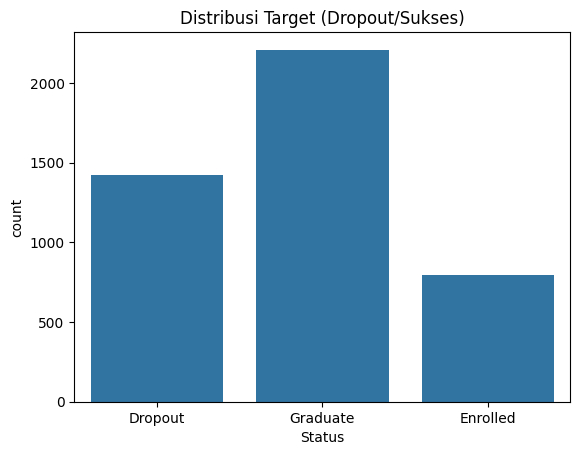

In [7]:
# visualisasi distribusi kolom target (status)
sns.countplot(x='Status', data=df)
plt.title('Distribusi Target (Dropout/Sukses)')
plt.show()

1. Informasi Umum Dataset
    - Jumlah data: 4.424 baris (mahasiswa)
    - Jumlah fitur: 37 kolom
    - Kolom target: Status dengan 3 kelas (Dropout, Graduate, Enrolled)
    - Tidak ada nilai null ditemukan di seluruh kolom.

2. Distribusi Target (Status)
    - Dropout: ~1.400 mahasiswa
    - Graduate: ~2.200 mahasiswa
    - Enrolled: ~800 mahasiswa

## Data Preparation / Preprocessing

In [8]:
# marital status
marital_status_map = {
    1: 'single', 2: 'married', 3: 'widower', 4: 'divorced',
    5: 'facto union', 6: 'legally separated'
}

# previous qualification
previous_qualification_map = {
    1: "Secondary education", 2: "Higher education - bachelor's degree",
    3: "Higher education - degree", 4: "Higher education - master's",
    5: "Higher education - doctorate", 6: "Frequency of higher education",
    9: "12th year of schooling - not completed", 10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling", 14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle", 38: "Basic education 2nd cycle",
    39: "Technological specialization", 40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical", 43: "Higher education - master (2nd cycle)"
}

# occupation 
occupation_map = {
    0: 'Student', 1: 'Legislative/Executive', 2: 'Scientific specialists',
    3: 'Technicians', 4: 'Admin staff', 5: 'Services/Sellers',
    6: 'Agriculture/Fisheries', 7: 'Industry/Construction',
    8: 'Machine Operators', 9: 'Unskilled Workers',
    10: 'Armed Forces', 90: 'Other', 99: 'Blank', 101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants', 103: 'Other Armed Forces',
    112: 'Admin/Commercial Directors', 114: 'Hotel/Trade Directors',
    121: 'Science/Engineering Specialists', 122: 'Health professionals',
    123: 'Teachers', 124: 'Finance/Admin Specialists', 125: 'ICT Specialists',
    131: 'Science/Engineering Technicians', 132: 'Health Technicians',
    134: 'Legal/Social/Cultural Technicians', 135: 'ICT Technicians',
    141: 'Secretaries/Data Operators', 143: 'Finance/Admin Operators',
    144: 'Other Admin Support', 151: 'Personal service workers', 152: 'Sellers',
    153: 'Personal care workers', 154: 'Security services',
    161: 'Farmers (market)', 163: 'Subsistence farmers', 171: 'Construction workers',
    172: 'Metallurgy workers', 173: 'Artisan/Precision workers', 174: 'Electricians/Electronics',
    175: 'Processing workers', 181: 'Plant operators', 182: 'Assembly workers',
    183: 'Drivers/Operators', 191: 'Cleaners', 192: 'Unskilled in agriculture',
    193: 'Unskilled in industry', 194: 'Meal assistants', 195: 'Street vendors'
}

# daytime/evening attendance
daytime_map = {1: 'daytime', 0: 'evening'}

# boolean fields
binary_map = {1: 'yes', 0: 'no'}
gender_map = {1: 'male', 0: 'female'}

# nationality
nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
}

# course
course_map = {
    33: 'Biofuel Production', 171: 'Animation/Multimedia', 8014: 'Social Service (evening)',
    9003: 'Agronomy', 9070: 'Communication Design', 9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering', 9130: 'Equinculture', 9147: 'Management',
    9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing', 9556: 'Oral Hygiene',
    9670: 'Ad/Marketing', 9773: 'Journalism', 9853: 'Basic Education', 9991: 'Management (evening)'
}

# application mode
app_mode_map = {
    1: '1st phase - general', 2: 'Ordinance 612/93', 5: 'Special - Azores',
    7: 'Other higher courses', 10: 'Ordinance 854-B/99', 15: 'International student',
    16: 'Special - Madeira', 17: '2nd phase - general', 18: '3rd phase - general',
    26: 'Different Plan', 27: 'Other Institution', 39: 'Over 23 years old',
    42: 'Transfer', 43: 'Change course', 44: 'Tech diploma',
    51: 'Change institution/course', 53: 'Short cycle diploma',
    57: 'Change institution/course (Int.)'
}

In [9]:
df_clean = df.copy()

In [10]:
# menerapkan mapping
df_clean['Marital_status'] = df_clean['Marital_status'].map(marital_status_map)
df_clean['Application_mode'] = df_clean['Application_mode'].map(app_mode_map)
df_clean['Course'] = df_clean['Course'].map(course_map)
df_clean['Previous_qualification'] = df_clean['Previous_qualification'].map(previous_qualification_map)
df_clean['Nacionality'] = df_clean['Nacionality'].map(nationality_map)

df_clean['Mothers_occupation'] = df_clean['Mothers_occupation'].map(occupation_map)
df_clean['Fathers_occupation'] = df_clean['Fathers_occupation'].map(occupation_map)

df_clean['Daytime_evening_attendance'] = df_clean['Daytime_evening_attendance'].map(daytime_map)
df_clean['Displaced'] = df_clean['Displaced'].map(binary_map)
df_clean['Educational_special_needs'] = df_clean['Educational_special_needs'].map(binary_map)
df_clean['Debtor'] = df_clean['Debtor'].map(binary_map)
df_clean['Tuition_fees_up_to_date'] = df_clean['Tuition_fees_up_to_date'].map(binary_map)
df_clean['Gender'] = df_clean['Gender'].map(gender_map)
df_clean['International'] = df_clean['International'].map(binary_map)
df_clean['Scholarship_holder'] = df_clean['Scholarship_holder'].map(binary_map)

In [11]:
df_clean.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general,5,Animation/Multimedia,daytime,Secondary education,122.0,Portuguese,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student,1,Tourism,daytime,Secondary education,160.0,Portuguese,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general,5,Communication Design,daytime,Secondary education,122.0,Portuguese,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general,2,Journalism,daytime,Secondary education,122.0,Portuguese,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening),evening,Secondary education,100.0,Portuguese,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
status_colors = {
    'Dropout': 'red',
    'Graduate': 'green',
    'Enrolled': 'blue'
}

C:\Users\ummua\AppData\Local\Temp\ipykernel_31572\2960958857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Admission_grade', data=df_clean, palette=status_colors)


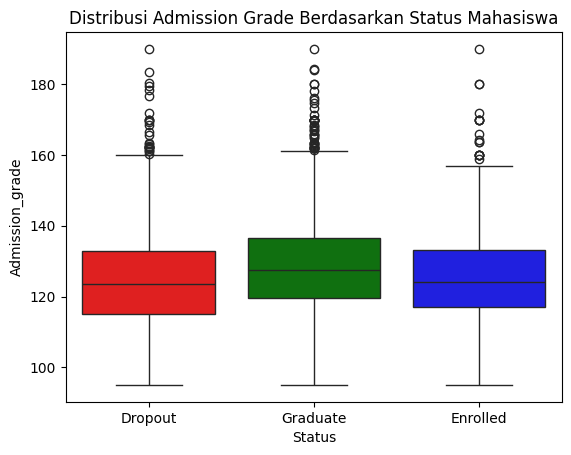

In [13]:
# apakah nilai masuk memengaruhi dropout?
sns.boxplot(x='Status', y='Admission_grade', data=df_clean, palette=status_colors)
plt.title('Distribusi Admission Grade Berdasarkan Status Mahasiswa')
plt.show()

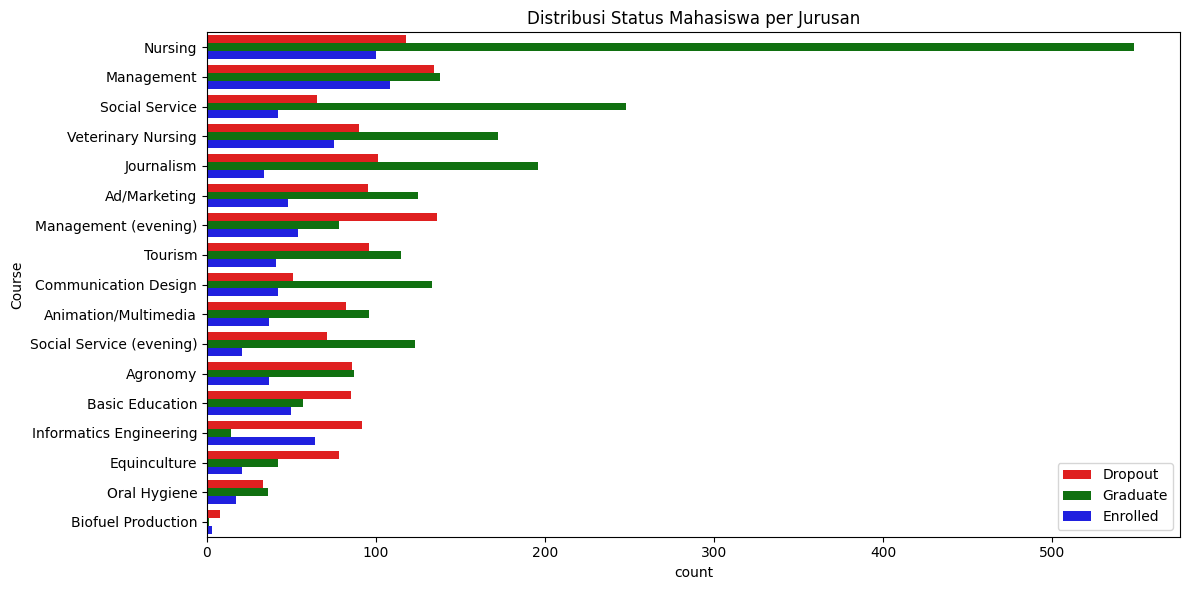

In [21]:
# jurusan mana yang punya dropout paling tinggi?
plt.figure(figsize=(12, 6))
sns.countplot(y='Course', hue='Status', data=df_clean, palette=status_colors, order=df_clean['Course'].value_counts().index)
plt.title('Distribusi Status Mahasiswa per Jurusan')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

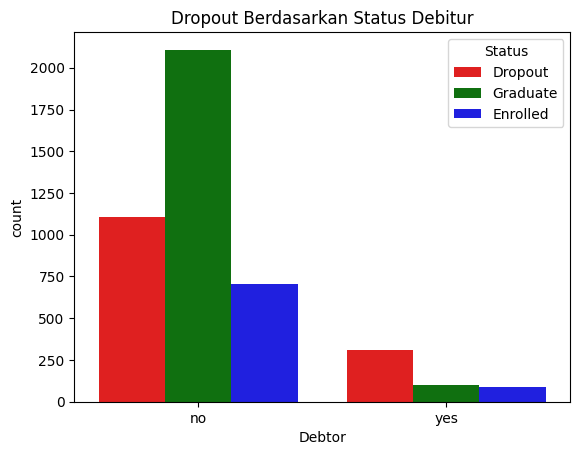

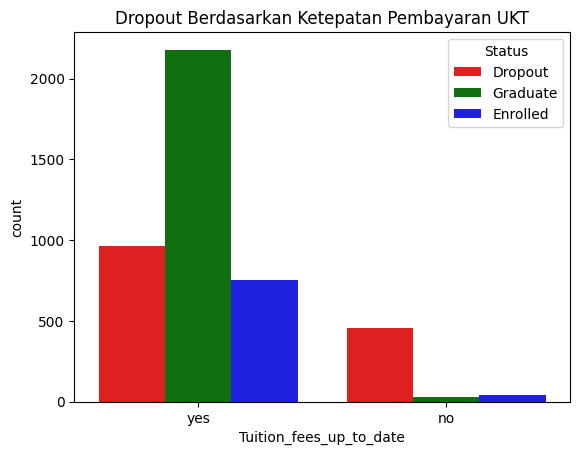

In [ ]:
# apakah mahasiswa dengan tunggakan lebih rentan dropout?
sns.countplot(x='Debtor', hue='Status', data=df_clean, palette=status_colors)
plt.title('Dropout Berdasarkan Status Debitur')
plt.show()

sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df_clean, palette=status_colors)
plt.title('Dropout Berdasarkan Ketepatan Pembayaran UKT')
plt.show()

C:\Users\ummua\AppData\Local\Temp\ipykernel_21356\2489378896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df_clean, palette=status_colors)


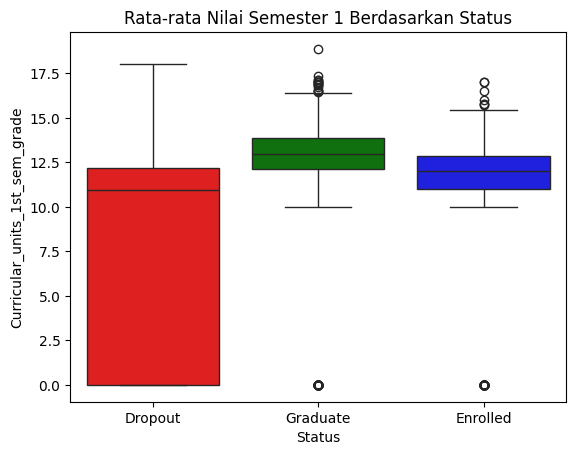

C:\Users\ummua\AppData\Local\Temp\ipykernel_21356\2489378896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Curricular_units_1st_sem_approved', data=df_clean, palette=status_colors)


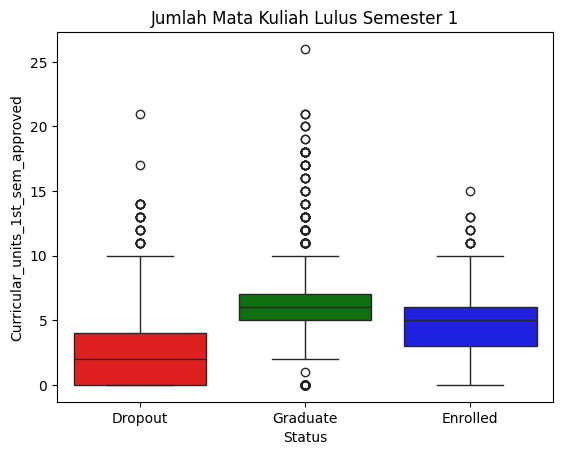

In [23]:
# apakah performa awal bisa memprediksi dropout?
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df_clean, palette=status_colors)
plt.title('Rata-rata Nilai Semester 1 Berdasarkan Status')
plt.show()

sns.boxplot(x='Status', y='Curricular_units_1st_sem_approved', data=df_clean, palette=status_colors)
plt.title('Jumlah Mata Kuliah Lulus Semester 1')
plt.show()

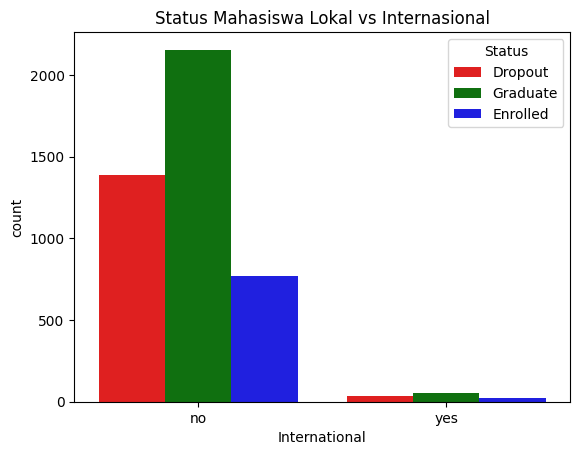

In [25]:
# Distribusi Internasional vs Status
sns.countplot(x='International', hue='Status', data=df_clean, palette=status_colors)
plt.title('Status Mahasiswa Lokal vs Internasional')
plt.show()

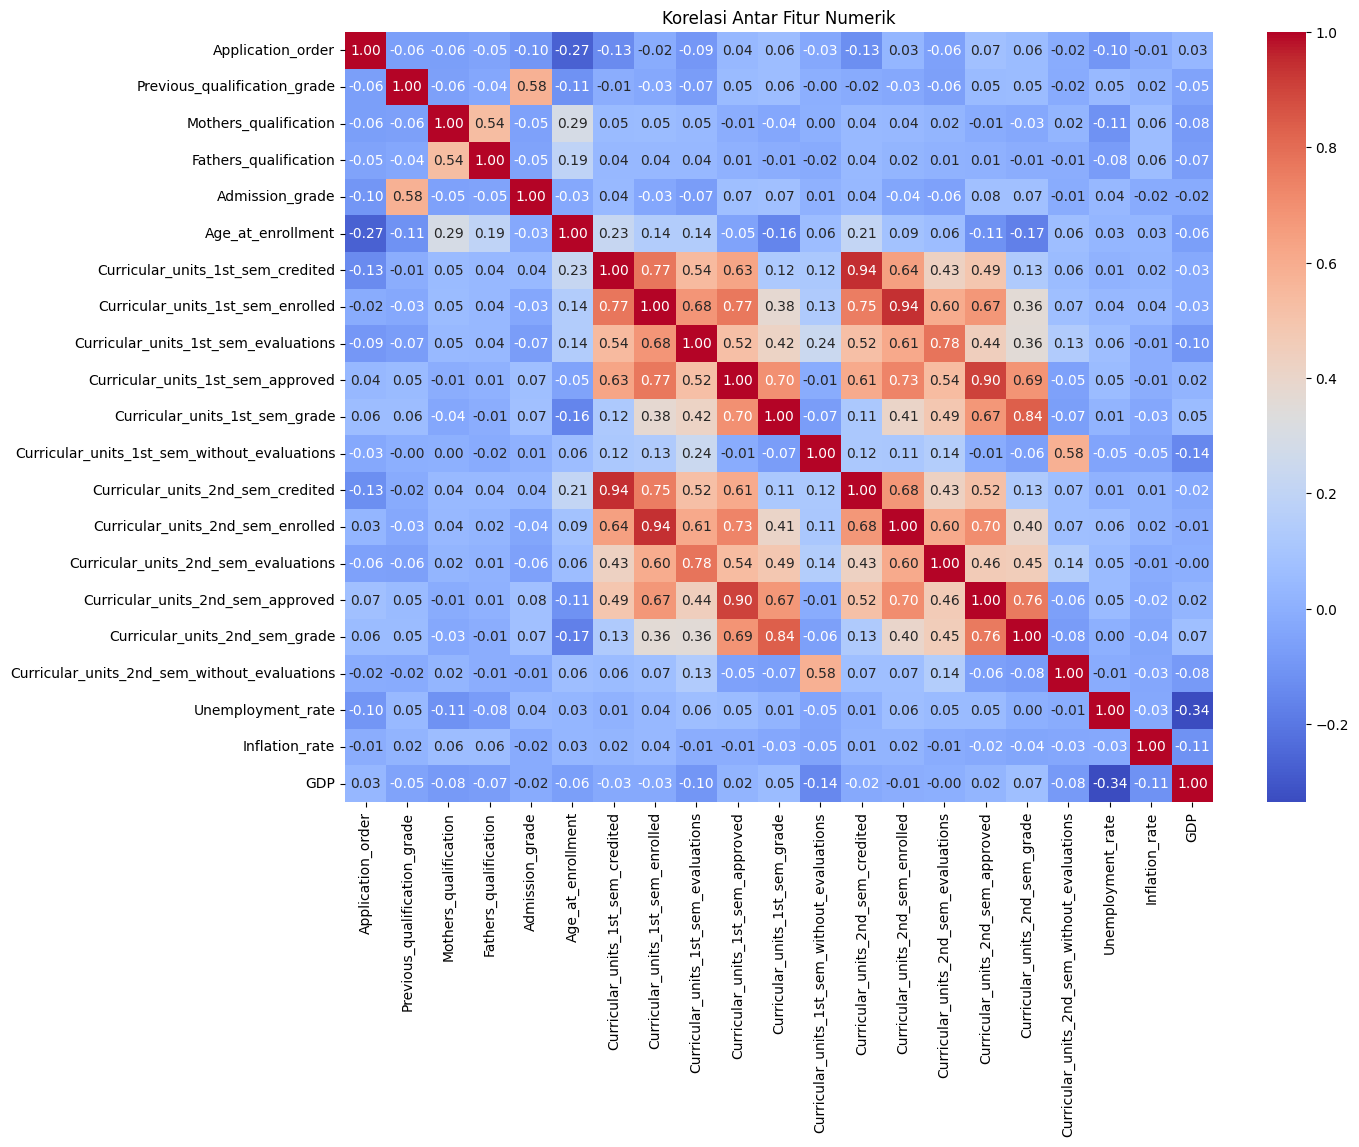

In [26]:
# heatmap korelasi fitur numerik
plt.figure(figsize=(14, 10))
numerical_features = df_clean.select_dtypes(include='number')
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [27]:
# save df_clean
df_clean.to_csv('data\data_clean.csv', index=False)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ummua\AppData\Local\Temp\ipykernel_21356\2900538047.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_clean.to_csv('data\data_clean.csv', index=False)


## Modeling

In [14]:
# encode target
le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status']) 

In [15]:
# pisahkan kolom fitur dan target
X = df.drop(columns=['Status', 'Status_encoded']) 
y = df['Status_encoded']

In [ ]:
# scaling fitur numerik
continuous_cols = ['Previous_qualification_grade', 'Admission_grade',
                   'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
                   'Unemployment_rate', 'Inflation_rate', 'GDP']

scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

In [16]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [43]:
col_names = X.columns.tolist()

# simpan kolom
joblib.dump(col_names, 'model\col_names.pkl')

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ummua\AppData\Local\Temp\ipykernel_21356\2807832115.py:4: SyntaxWarning: invalid escape sequence '\c'
  joblib.dump(col_names, 'model\col_names.pkl')


['model\\col_names.pkl']

In [17]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [23]:
# inisialisasi model xgboost dengan multi-class support
xgb_model = XGBClassifier(
    objective='multi:softprob', 
    num_class=3,               
    eval_metric='mlogloss',   
    use_label_encoder=False,
    random_state=42,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1
)

# latih model
xgb_model.fit(X_train, y_train)

# prediksi
y_pred_xgb = xgb_model.predict(X_test)

c:\Users\ummua\Documents\Bangkit ML\jaya institut\jaya\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:16:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Evaluation

In [21]:
# random forest evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.57      0.37      0.45       159
    Graduate       0.78      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885



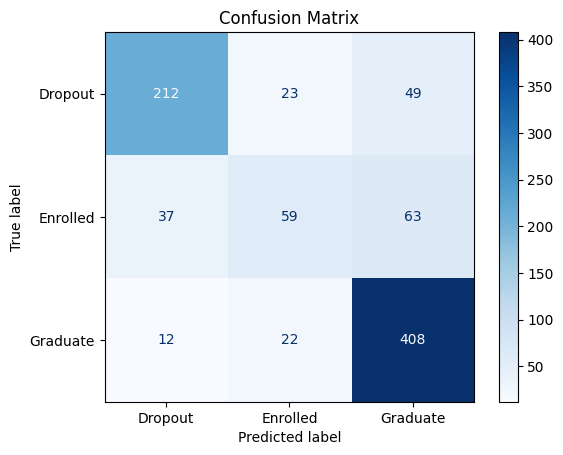

In [19]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=le.classes_, cmap='Blues'
)
plt.title("Confusion Matrix")
plt.show()

In [24]:
# xgboost evaluation
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

Classification Report (XGBoost):
              precision    recall  f1-score   support

     Dropout       0.81      0.72      0.76       284
    Enrolled       0.52      0.42      0.46       159
    Graduate       0.80      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



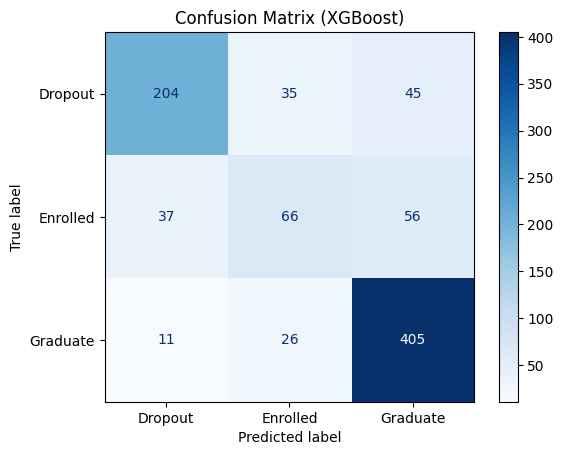

In [25]:
ConfusionMatrixDisplay.from_estimator(
    xgb_model, X_test, y_test, display_labels=le.classes_, cmap='Blues'
)
plt.title("Confusion Matrix (XGBoost)")
plt.show()

In [ ]:
# simpan model random forest
joblib.dump(clf, 'model\model.pkl')
joblib.dump(X_train.columns.tolist(), "model\columns.pkl")
joblib.dump(le, 'model\label_encoder.pkl')


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\ummua\AppData\Local\Temp\ipykernel_31572\2217383448.py:2: SyntaxWarning: invalid escape sequence '\m'
  joblib.dump(clf, 'model\model.pkl')
C:\Users\ummua\AppData\Local\Temp\ipykernel_31572\2217383448.py:3: SyntaxWarning: invalid escape sequence '\c'
  joblib.dump(X_train.columns.tolist(), "data\columns.pkl")
C:\Users\ummua\AppData\Local\Temp\ipykernel_31572\2217383448.py:4: SyntaxWarning: invalid escape sequence '\l'
  joblib.dump(le, 'model\label_encoder.pkl')


['model\\label_encoder.pkl']